### Carga de paquetes

In [4]:
import numpy as np


from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt #Para graficar
from skimage.io import imshow #Para graficar las imagenes
import tensorflow as tf


import os
import glob
#from PIL import Image
import cv2

#import pyheif

import matplotlib.pyplot as plt


In [ ]:
#pip install pyheif

In [5]:
#pip install Pillow


Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install pillow_heif

Note: you may need to restart the kernel to use updated packages.


In [5]:
#root_path = "C:/MaestriaDocs/DMA/Nuestras Caras/"
root_path = "C:/MaestriaDocs/DMA - Proyecto/caras_grupo4/"
directorio_origen = root_path + "Nuestras Caras"
#path="C:/Users/nsantesteban.avalian/Desktop/Nuestras Caras"
destino = root_path + "Caras_cortadas"

In [6]:
names = []
for dir in os.listdir(directorio_origen):
    names.append(dir)
names.count
names

['Carlos',
 'Federico G',
 'Federico R',
 'Florencia',
 'Franco A',
 'Franco S',
 'Gerard',
 'Gustavo',
 'Joaquin',
 'Juan',
 'Lautaro',
 'Lisandro',
 'Marco',
 'Matias',
 'Natalia',
 'Noelia',
 'Paola',
 'Victorio']

In [7]:
from PIL import Image
import imageio

def convertir_heic_a_jpg(ruta_entrada, ruta_salida):
    try:
        # Lee la imagen HEIC
        imagen_heic = imageio.imread(ruta_entrada)
        # Guarda la imagen como JPEG
        imageio.imwrite(ruta_salida, imagen_heic)
        print("La conversión se ha realizado con éxito.")
    except Exception as e:
        print(f"Error al convertir la imagen: {e}")

def convertir_persona_HIEC_a_jpg(ruta_persona):

    for archivo_hiec in glob.glob(os.path.join(ruta_persona, "*.HEIC")):
        
        HIEC_archivo_sin_ext, _ = os.path.splitext(archivo_hiec)
        jpg_path = HIEC_archivo_sin_ext + ".jpg"
        convertir_heic_a_jpg(archivo_hiec, jpg_path)

In [8]:
# Diccionario para almacenar las fotos
def Leer_fotos(directorio_origen_f):
    fotos_int= {} # diccionario interno q sea persona y el vector de fotos, y por otro lado probamos dos vectores,
    #despues elegimos una de las dos estructuras
    #v_fotos_personas =[] #este vector tendra todas las fotos
    #v_nombre_personas = [] #este vector tendra el nombre de la persona, forrespondiente a la foto del vetor fotos_persona en la misma posicion
    # Recorrer las subcarpetas

    for nombre_persona in os.listdir(directorio_origen_f):
        # Ruta de la subcarpeta
        ruta_persona = os.path.join(directorio_origen_f, nombre_persona)

        # Lista para almacenar las fotos de la persona
        fotos_persona = []    
        #convertir hiec a png
        convertir_persona_HIEC_a_jpg(ruta_persona)
        # Recorrer las fotos de la persona
        for archivo in glob.glob(os.path.join(ruta_persona, "*.jpg")) :
            # Cargar la imagen
            imagen = cv2.imread(archivo)              
            fotos_persona.append(imagen)
            #v_fotos_personas.append(imagen)
            #_nombre_personas.append(nombre_persona)
            # Agregar las fotos de la persona al diccionario
        fotos_int[nombre_persona] = fotos_persona
    return fotos_int


# llamada a la funcion leer fotos, con el directorio de origen



In [ ]:
#fotos = Leer_fotos(directorio_origen)


In [9]:
# Mostrar información
nombres_personas = list(fotos.keys())
print("Cantidad de personas:", len(nombres_personas))
print("Cantidad de fotos por persona:")
for nombre_persona, fotos_persona in fotos.items():
    print(f"- {nombre_persona}: {len(fotos_persona)}")



NameError: name 'fotos' is not defined

## funcion para imprimir fotos de una persona

In [11]:
def show_people(images):
    names_target = list(images.keys())

    rows = 5
    cols = 4
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))

    axarr=axarr.flatten()
    
    for image_index in range(len(names_target)):
        axarr[image_index].imshow(images[names_target[image_index]][0])
        axarr[image_index].set_xticks([])
        axarr[image_index].set_yticks([])
        axarr[image_index].set_title("Nombre:{}".format(names_target[image_index]))
    
    #Replico formato a los que no tienen caras
    for image_index in range(len(names_target), (rows * cols)):     
        axarr[image_index].set_xticks([])
        axarr[image_index].set_yticks([])
        axarr[image_index].set_title("Nombre:N/A")

    plt.suptitle("Las caras")
    
# llamada a la funcion que imprime


## Funcion para imprimir X cantidad de fotos por persona

In [13]:
def show_people_agg_cant(dfotos, cant):
    #Visualizacion de "cant"  imagenes por cada alumno
    n_pics_per_person = cant
    n_cols = n_pics_per_person
    
    names_= list(dfotos.keys())
    n_rows = len(names_)  #18
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(1.6*n_cols, 2*n_rows))
    
    index=0
    for nombre in names_:
        
        # Select images using boolean indexing
        img = dfotos[nombre]
        
        for image_index in range(min(len(img),cant)):
            imag_i = img[image_index]
            axs[index, image_index].imshow(imag_i)
            axs[index, image_index].set_xticks([])
            axs[index, image_index].set_yticks([])
        
        axs[index, 0].set_title(nombre)
        index += 1


## Analisis Componentes Principales.

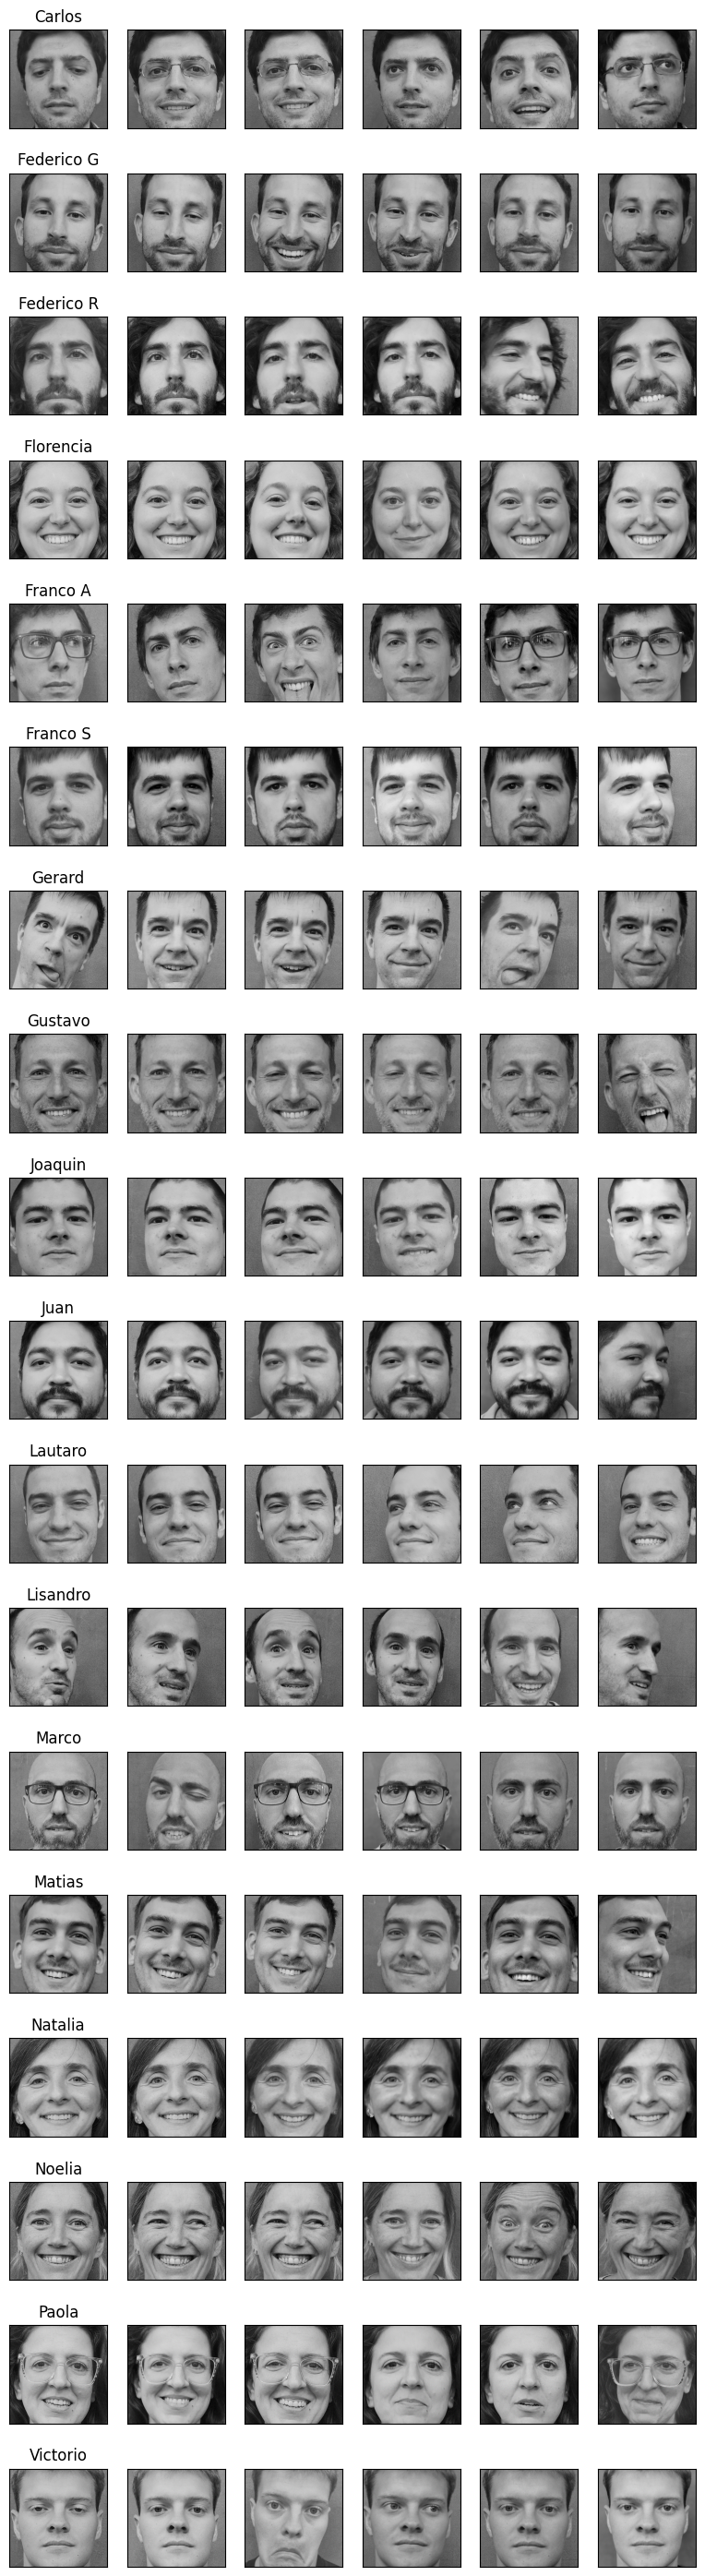

In [16]:
fotos_caras2 = Leer_fotos(destino)
show_people_agg_cant(fotos_caras2,6)

In [19]:
# Mostrar información
nombres_personas = list(fotos_caras2.keys())
print("Cantidad de personas:", len(nombres_personas))
print("Cantidad de fotos por persona:")
for nombre_persona, fotos_persona in fotos_caras2.items():
    print(f"- {nombre_persona}: {len(fotos_persona)}")

Cantidad de personas: 18
Cantidad de fotos por persona:
- Carlos: 13
- Federico G: 14
- Federico R: 15
- Florencia: 10
- Franco A: 11
- Franco S: 8
- Gerard: 11
- Gustavo: 7
- Joaquin: 11
- Juan: 12
- Lautaro: 18
- Lisandro: 13
- Marco: 9
- Matias: 15
- Natalia: 11
- Noelia: 11
- Paola: 14
- Victorio: 10


### PCA

Conversión de las imágenes a un Numpy Array. Conversión de los datos a una matriz que contiene datos sin procesar. La función array by numpy toma una lista como entrada-

In [20]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA

In [21]:
# Definir la ruta del directorio con las imágenes recortadas
dir_name_recorte = destino

# Tamaño fijo al que redimensionar todas las imágenes
desired_size = (30, 30)
# Guardar las imágenes proyectadas
output_directory = root_path + "PCA"
# Listas para almacenar las imágenes y sus nombres
images = []
image_names = []
image_person = []

# Leer las imágenes del directorio y almacenarlas en las listas
images = []
for root, dirs, files in os.walk(dir_name_recorte):
        for dir_name in dirs:
            print("Carpeta:", dir_name)
            dir_path = os.path.join(root, dir_name) #directorio  de la persona
            dir_destino_path = os.path.join(root, dir_name) #directorio  de la persona
            for file_name in os.listdir(dir_path):
                #for file_name in glob.glob(os.path.join(dir_path, "*.jpg")) :
            
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                    image_path = os.path.join(dir_path, file_name)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
                if image is not None:
                    # Redimensionar la imagen al tamaño deseado
                    resized_image = cv2.resize(image, desired_size)
            
                    images.append(resized_image.flatten())  # Aplanar la imagen y agregarla a la lista
                    image_names.append(file_name)
                    image_person.append(dir_name)
# Convertir la lista de imágenes a una matriz NumPy
image_matrix = np.array(images) 


Carpeta: Carlos
Carpeta: Federico G
Carpeta: Federico R
Carpeta: Florencia
Carpeta: Franco A
Carpeta: Franco S
Carpeta: Gerard
Carpeta: Gustavo
Carpeta: Joaquin
Carpeta: Juan
Carpeta: Lautaro
Carpeta: Lisandro
Carpeta: Marco
Carpeta: Matias
Carpeta: Natalia
Carpeta: Noelia
Carpeta: Paola
Carpeta: Victorio


In [22]:
# Aplicar PCA
num_components  = 100  # Número de componentes principales a mantener

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
imagenes_estandarizadas = scaler.fit_transform(image_matrix)


pca             = PCA(n_components=num_components)
pca.fit(imagenes_estandarizadas)
# Proyectar las imágenes al espacio de los componentes principales
projected_images = pca.transform(imagenes_estandarizadas)

num_componentes_reduced =60
corrimiento = 2
reduced_component = pca.components_.copy() # creamos un nuevo objeto con los componentes principales matrix (componenteppal*feature) (60*900)
reduced_component = reduced_component[corrimiento:60+corrimiento]
projected_images_reduced = imagenes_estandarizadas @ np.transpose(reduced_component) #image_matrix(cant_fotos,900) * transpuesta(900 * 60 componentes)
 
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for i, projected_image in enumerate(projected_images):
    output_path = os.path.join(output_directory, f"{image_names[i].split('.')[0]}_proyectada.npy")
    np.save(output_path, projected_image)
    output_path = os.path.join(output_directory, f"{image_names[i].split('.')[0]}_reduced.npy")
    np.save(output_path, projected_images_reduced[i])

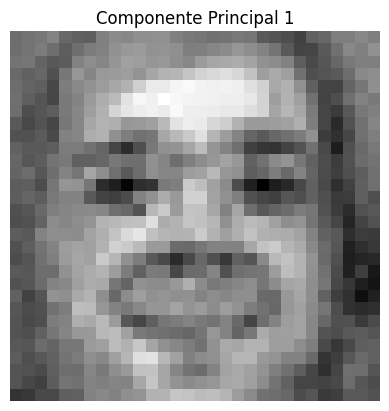

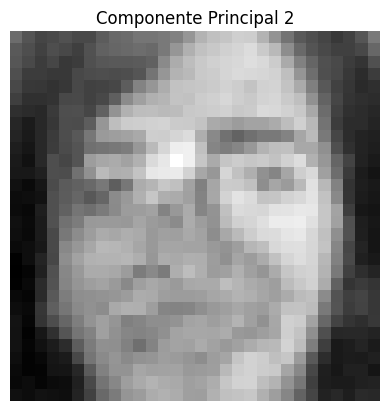

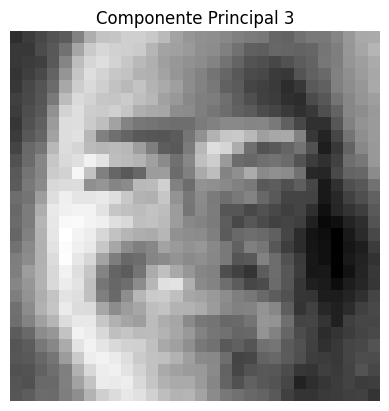

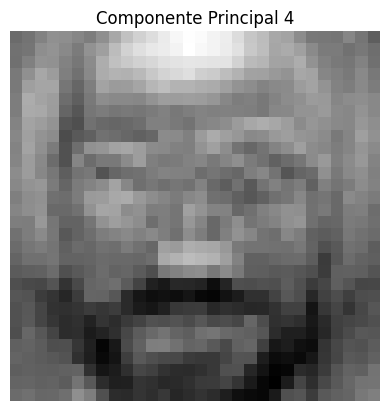

In [23]:

# observamos, imagenes armadas con los primeros 4 componentes principales

for i in range(4):
    # Extrae la componente principal correspondiente
    #componente_principal = eigenvectors[:, indice_componente_principal]
    indice_componente_principal = i
    # Normaliza la componente principal para que sus valores estén en el rango [0, 255]
    #componente_principal_normalizada = (componente_principal - componente_principal.min()) / (componente_principal.max() - componente_principal.min()) * 255
    componente_principal_normalizada =  pca.components_.copy()[indice_componente_principal]
    # Convierte la componente principal normalizada en una matriz de la forma de una imagen (por ejemplo, 30x30 píxeles)
    imagen_componente_principal = componente_principal_normalizada.reshape((30, 30))

    # Visualiza la imagen de la componente principal
    plt.imshow(imagen_componente_principal, cmap='gray')
    plt.title(f'Componente Principal {indice_componente_principal + 1}')
    plt.axis('off')
    plt.show()

## PCA Paso a Paso

In [25]:
import numpy as np

faces_array=image_matrix

# Select every 3rd column starting from 0 up to 900 (inclusive)
selected_cols = np.arange(0, 900)    #Crea y devuelve una referencia a un array de una dimención cuyos elementos 
                                     #son la secuencia desde el inicio hasta el fin tomando valores a cada salto.
                                     #np.arange(inicio, fin, salto). El salto se puede no poner por defecto toma valor 1

# Indexación avanzada para seleccionar las columnas de faces_array
new_faces_array = faces_array[:, selected_cols]

In [26]:
# Paso 1: Centrar los datos
new_faces_array_centered = new_faces_array - new_faces_array.mean(axis=0)

In [27]:
# Paso 2: Cálculo matriz de Covarianza
cov_matrix = np.cov(new_faces_array_centered, rowvar=False)

In [28]:
# Paso 3: Cálculo matriz eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [29]:
# Paso 4: Ordenar los eigenvectors por disminución eigenvalues
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

In [30]:
# Paso 5: Elejir la cantidad de componentes principales que se desean conservar
explained_variances = abs(eigenvalues / np.sum(eigenvalues)) * 100
total_variance = np.cumsum(abs(explained_variances)) 
# calcula la suma acumulativa de los elementos en el arreglo explained_variances utilizando la función cumsum() de NumPy.

# explained_variances es un arreglo unidimensional que contiene las varianzas explicadas por cada componente principal en orden descendente 
# (es decir, el primer elemento es la varianza explicada por el primer componente principal, el segundo elemento es la suma de las varianzas explicadas 
# por el primer y segundo componentes principales, y así sucesivamente).
# El resultado de np.cumsum(explained_variances) será otro total_variance  de la misma longitud que explained_variances, 
# donde cada elemento representa la suma acumulativa de las varianzas explicadas hasta el índice correspondiente.
num_components = np.argmax(total_variance >= 95) + 1
# np.argmax(total_variance >= 95) devuelve el índice del primer elemento en el arreglo total_variance que es mayor o igual a 95. 
# Luego se le suma 1 para obtener el número de componentes principales necesario para explicar al menos el 95% de la varianza total.

print(f'Cantidad de componentes a utilizar: {num_components}')
print(explained_variances)



Cantidad de componentes a utilizar: 109
[1.74071643e+01 1.15816444e+01 9.31597988e+00 6.42474537e+00
 4.37922798e+00 3.70414852e+00 2.75904128e+00 2.20007740e+00
 2.00479533e+00 1.82846149e+00 1.59822667e+00 1.45432743e+00
 1.37374270e+00 1.23069299e+00 1.09342518e+00 1.00621468e+00
 9.35289438e-01 8.81161376e-01 8.09031897e-01 7.69151205e-01
 7.36296582e-01 7.29626057e-01 6.35415370e-01 6.24755399e-01
 5.87265397e-01 5.68945661e-01 5.63788845e-01 5.30766083e-01
 5.14642783e-01 4.98761606e-01 4.48618906e-01 4.39686861e-01
 4.22604313e-01 4.08413883e-01 3.90515806e-01 3.80116558e-01
 3.69398275e-01 3.62049944e-01 3.57986392e-01 3.44379792e-01
 3.40573708e-01 3.30883003e-01 3.22579091e-01 3.15377900e-01
 3.11644756e-01 2.93304297e-01 2.83444019e-01 2.79397015e-01
 2.71847049e-01 2.67048266e-01 2.65584498e-01 2.51462787e-01
 2.49215136e-01 2.39204341e-01 2.38381279e-01 2.29527837e-01
 2.26152588e-01 2.18963011e-01 2.14929700e-01 2.14210338e-01
 2.07783767e-01 2.03292783e-01 1.99234750e-01

In [31]:
# Paso 6: Proyectar los datos centrados sobre la nueva base formada por los eigenvectors
new_basis = eigenvectors[:, :num_components]
new_faces_array_transformed = np.dot(new_faces_array_centered, new_basis) #multiplicacion matricial

In [32]:
# Paso 7: Mostrar los datos transformados
print(new_faces_array_transformed)
new_faces_array_transformed.shape
new_basis.shape

[[ 3.12823975e+02  3.79053412e+02 -2.90627593e+02 ... -3.01490742e+01
  -3.20920454e+01  5.82173619e-01]
 [ 3.81955282e+02  7.26187320e+01 -2.91650366e+02 ... -7.63100287e+01
   4.79301523e+01 -7.07775935e+01]
 [ 3.66427875e+02  1.66290423e+02 -3.55091473e+02 ... -2.53597108e+01
   2.92024378e+00  4.86997978e+01]
 ...
 [-1.00808386e+03 -5.28754630e+02 -1.54771458e+02 ...  3.33821136e+01
  -3.02887680e+01 -1.34668756e+01]
 [-1.46145156e+02  6.42042334e+01 -4.60664428e+01 ... -5.26418576e+01
   2.53120699e+01 -5.46900347e+00]
 [-6.37918106e+02 -2.74798667e+02 -3.05456884e+02 ... -1.33901752e+00
   4.82194371e+01  1.07817761e+01]]


(900, 109)

In [33]:
# Para ver el nro de imágenes proyectadas y la cantidad de componentes principales

# Verificar las dimensiones de new_faces_array_transformed
num_images_proyected, num_components_selected = new_faces_array_transformed.shape

print("Número de imágenes proyectadas:", num_images_proyected)
print("Número de componentes principales seleccionadas:", num_components_selected)



Número de imágenes proyectadas: 213
Número de componentes principales seleccionadas: 109


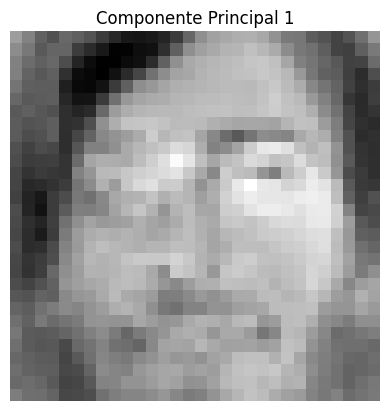

In [34]:
import matplotlib.pyplot as plt

# Indicar componente principal específica
indice_componente_principal = 0

# Extrae la componente principal correspondiente
componente_principal = eigenvectors[:, indice_componente_principal]

# Normaliza la componente principal para que sus valores estén en el rango [0, 255]
#componente_principal_normalizada = (componente_principal - componente_principal.min()) / (componente_principal.max() - componente_principal.min()) * 255
componente_principal_normalizada = componente_principal
# Convierte la componente principal normalizada en una matriz de la forma de una imagen (por ejemplo, 30x30 píxeles)
imagen_componente_principal = componente_principal_normalizada.reshape((30, 30))

# Visualiza la imagen de la componente principal
plt.imshow(imagen_componente_principal, cmap='gray')
plt.title(f'Componente Principal {indice_componente_principal + 1}')
plt.axis('off')
plt.show()

In [35]:
# NUEVO # ------------------------------------------

# Número de componentes principales a mantener
num_components = 60  # o el número que hayas elegido previamente
corrimiento = 3 #vamos a quitar las primeras 3 componentes (0,1 y 2 )

# Excluir las tres primeras componentes principales
new_basis = eigenvectors[:, corrimiento:corrimiento + num_components] # aca no deberiamos hacer de 2 a nump_components+2? el 0 pensando q arranca de cero y sumar al final si queremos 60 componentes

# Proyectar los datos centrados sobre la nueva base
new_faces_array_transformed = np.dot(new_faces_array_centered, new_basis)
new_faces_array_transformed.shape

(213, 60)

Imágenes

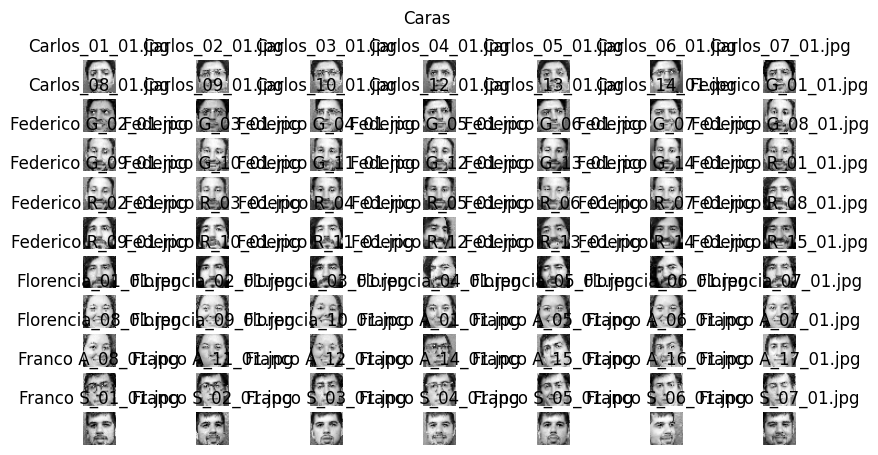

In [36]:
import matplotlib.pyplot as plt

# Número de columnas y filas en la cudrícula
num_rows = 10
num_cols = 7

# Crear una nueva figura y ponerle un título
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
fig.suptitle('Caras')

# Recorta las primeras 10 caras y las muestra.
for i in range(num_rows * num_cols):
    if i >= faces_array.shape[0]:
        break
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(faces_array[i].reshape((30,30)), cmap='gray') # 30 Es el tamaño de la imagen
    ax.set_title(image_names[i])
    ax.axis('off')

# Show the plot
plt.show()                             ##ver no entiendo que se esta imprimiendo?????????????????????????????

Otra versión para ver las imágenes.

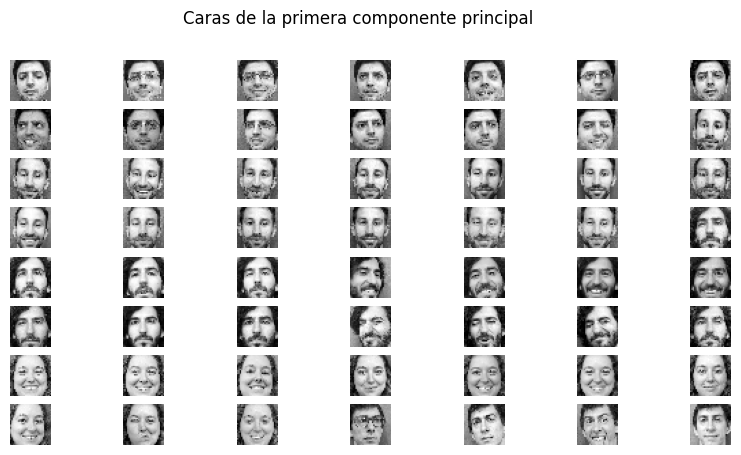

In [37]:
import matplotlib.pyplot as plt

# Número de columnas y filas en la cuadrícula
num_rows = 8
num_cols = 7

# Crear una nueva figura y ponerle un título
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
fig.suptitle('Caras de la primera componente principal')

# Filtrar las imágenes que corresponden a la primera componente principal
first_component_images = []

for i in range(new_faces_array_transformed.shape[0]):
    if new_faces_array_transformed[i, 0] != 0:  # Si la primera componente principal no es cero
        first_component_images.append(faces_array[i])

# Mostrar las primeras imágenes que corresponden a la primera componente principal
for i, image in enumerate(first_component_images):
    if i >= num_rows * num_cols:
        break
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(image.reshape((30,30)), cmap='gray')
    ax.axis('off')

# Mostrar el gráfico
plt.show()         ##ver no entiendo que se esta imprimiendo?????????????????????????????

Ver datos trasnformados y trazar diagrama de Scree plot y PC1 vs. PC2

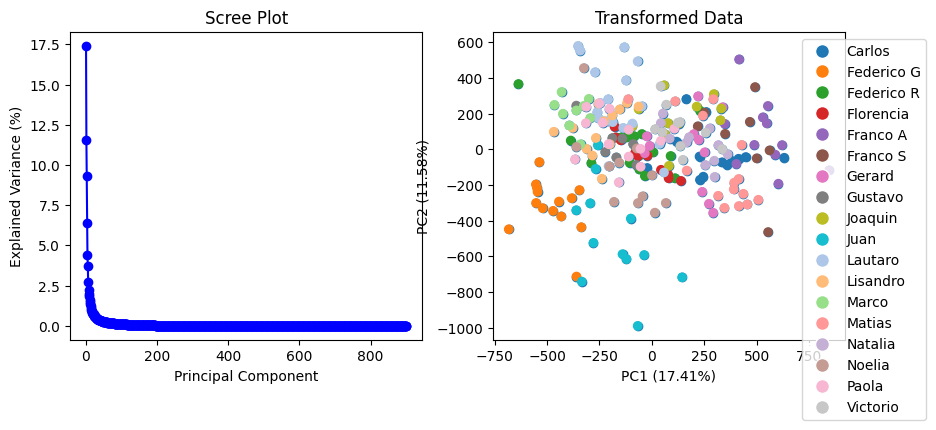

In [38]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) # Creación grilla

# Gráfico de Scree plot
ax1.plot(np.arange(1, len(explained_variances)+1), explained_variances, 'bo-')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance (%)')
ax1.set_title('Scree Plot')

# Gráfico de contribuciones individuaeles PCA1 vs- PCA2
#ax2.scatter(new_faces_array_transformed[:, 0], new_faces_array_transformed[:, 1],  c=image_person)
# Gráfico de contribuciones individuales PCA1 vs PCA2
scatter = ax2.scatter(new_faces_array_transformed[:, 0], new_faces_array_transformed[:, 1], label=image_person)
# Agregar leyenda
# legend1 = ax2.legend(*scatter.legend_elements(),                    loc="upper left", title="Image Person")



# Supongamos que image_person es una lista o array que contiene los nombres de las imágenes
# y que tiene la misma longitud que new_faces_array_transformed
# Y que personas es un conjunto de todas las personas únicas en image_person
personas = np.unique(image_person)

# Creamos una paleta de colores personalizada con 18 colores
# Puedes modificar los colores como desees
paleta_colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7']

# Creamos un diccionario que asigna a cada persona un color específico
colores = {}
for i, persona in enumerate(personas):
    colores[persona] = paleta_colores[i % len(paleta_colores)]

# Convertimos los nombres de las personas en colores según el diccionario
colores_personas = [colores[persona] for persona in image_person]

# Gráfico de contribuciones individuales PCA1 vs PCA2
scatter = ax2.scatter(new_faces_array_transformed[:, 0], new_faces_array_transformed[:, 1], c=colores_personas)

# Crear leyenda personalizada
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[persona], markersize=10, label=persona) for persona in personas]
ax2.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))

ax2.set_xlabel('PC1 ({:.2f}%)'.format(explained_variances[0]))
ax2.set_ylabel('PC2 ({:.2f}%)'.format(explained_variances[1]))
ax2.set_title('Transformed Data')
plt.show()

## Aplicamos Backpropagation

In [39]:
new_faces_array_transformed.shape #vemos el vector con las caras y sus 60 componentes a partir de la 3ra

(213, 60)

In [40]:
personas

array(['Carlos', 'Federico G', 'Federico R', 'Florencia', 'Franco A',
       'Franco S', 'Gerard', 'Gustavo', 'Joaquin', 'Juan', 'Lautaro',
       'Lisandro', 'Marco', 'Matias', 'Natalia', 'Noelia', 'Paola',
       'Victorio'], dtype='<U10')

In [41]:
personas.shape

(18,)

In [42]:
image_person #(vector que tiene el nombre de la persona de cada foto)

['Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Franco A',
 'Franco A',
 'Franco A',
 'Franco A',
 'Franco A',
 'Franco A',
 'Franco A',
 'Franco A',
 'Franco A',
 'Franco A',
 'Franco A',
 'Franco S',
 'Franco S',
 'Franco S',
 'Franco S',
 'Franco S',
 'Franco S',
 'Franco S',
 'Franco S',
 'Gerard',
 'Gerard',
 'Gerard',
 '

In [45]:
salida_lista = []  # Array vacío para almacenar las listas de 0 y 1
cantidad_personas = len(personas) #podiramos hacer un elemento menos pero por ahora lo dejamos en el total
# Recorrer cada elemento en "image_person"
for imagen_persona in image_person:
  lista_persona = [0] * cantidad_personas   # Inicializar lista con 18 ceros
  
  # Buscar el índice del nombre de la imagen en "personas"
 # Encontrar el índice de la persona
  indice_persona =  np.where(personas == imagen_persona)[0]

  # Si se encuentra la persona, actualizar la lista
  if len(indice_persona) > 0:
    lista_persona[indice_persona[0]] = 1
  
  # Actualizar el elemento correspondiente en la lista con 1

  
  # Agregar la lista a Y
  salida_lista.append(lista_persona)

salida_lista = np.array(salida_lista) 
salida_lista


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [46]:
salida_lista.shape

(213, 18)

In [49]:
X = new_faces_array_transformed
Y = salida_lista

# Normalización de las entradas
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

# Convierte la lista a un arreglo NumPy
#salida_lista = nombres_personas
salida = np.array(salida_lista)
Y = salida #salida.reshape(len(X),1)

epoch_limit = 30


## usando tensor flow

In [50]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(60,)),  # Capa de entrada con 60 características - Cantidad de componentes PCA
    tf.keras.layers.Dense(213, activation='relu'),  # Capa oculta con 213 neuronas y función de activación ReLu (trasmite la infoamción generada por la combinación lineal de los pesos y las entredas, especificamente ReLu permite la propagación hacia atrás efectiva)
                                                    # ReLu genera una salida igual a cero cuando la entrada (z) sea negativa, y una salida igual a la entrefa cuando está última es positiva. 
    tf.keras.layers.Dense(18, activation='softmax') # Capa de salida con 18 neuronas y función de activación Softmax (La función calcula la distribución de probabilidades del evento sobre "n" eventos diferentes)
                                                    # Convierte los datos en probabilidades y la suma de las probabilidades da como resultado 1.
])

# Compilar / configurar el proceso de entrenamiento del modelo
model.compile(optimizer='adam', # El optimizador ajusta los parámetros de la red (pesos y sesgos) para minimizar la función pérdida.
                                # Tasa de aprendizaje que se adapta a cada parámetro en forma individual en función de las estimaciones del momento y de la magnitud del gradiente
                                # Busca que el modelo se ajuste a los datos de entrenamiento de manera eficiente y efectiva lo que puede mejorar la predicción.
              loss='categorical_crossentropy',  # Función de pérdida para clasificación multiclase. Mide la diferencia de entre las distribucuines de probabilidades predichas por el modelo y las distribuciones reales de las clases.
              metrics=['accuracy']) # Métrica utilizada para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación
                                    # Se una para medir la precisión del modelo (proporción de muestras clasificadas correctamente sobre el total de las muestas)


# Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=epoch_limit, batch_size=32, validation_data=(X_test, Y_test)) # ANALIZAR GUARDAR LOS RESULTADOS




Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0850 - loss: 3.0067 - val_accuracy: 0.0698 - val_loss: 2.8650
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1817 - loss: 2.6208 - val_accuracy: 0.0698 - val_loss: 2.7393
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3518 - loss: 2.2883 - val_accuracy: 0.1860 - val_loss: 2.6151
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5413 - loss: 2.0075 - val_accuracy: 0.3023 - val_loss: 2.4963
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7683 - loss: 1.7691 - val_accuracy: 0.3256 - val_loss: 2.3947
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8735 - loss: 1.5332 - val_accuracy: 0.3953 - val_loss: 2.2850
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9253 - loss: 1.3409 - val_accuracy: 0.4651 - val_loss: 2.1688
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9578 - loss: 1.1363 - val_accuracy: 0.4884 - val_loss: 2.0628
Epoch 9

In [51]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

#model.evaluate(X_test, Y_test) BORRAR

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8912 - loss: 0.8890 


[0.9147536754608154, 0.8837209343910217]

In [58]:
# Obtener las predicciones para el conjunto de prueba
predictions = model.predict(X_test)

# Iterar sobre las predicciones y mostrar el resultado para cada foto
for i in range(len(predictions)):
    # Obtener la predicción para la i-ésima foto
    prediction = predictions[i]
    # Encontrar la etiqueta predicha (la clase con probabilidad más alta)
    predicted_label = np.argmax(prediction) # Identifica la clase que el modelo considera más probable para la imagen
    # Mostrar el resultado
    print(f"Foto {i+1}: Predicción = {predicted_label}, Probabilidades = {prediction}") # nro de foto - la clase con mayor probabilidad - probabilidad de pertenencia a cada clase.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Foto 1: Predicción = 0, Probabilidades = [0.7381562  0.01313804 0.01185677 0.03315202 0.00413405 0.01134224
 0.01408036 0.00264817 0.00599455 0.03149468 0.0680159  0.00894477
 0.00123309 0.01508429 0.00577486 0.01487023 0.01765196 0.00242769]
Foto 2: Predicción = 16, Probabilidades = [0.02805647 0.04927355 0.00754057 0.02057031 0.14787218 0.00890234
 0.00571955 0.05132816 0.03079228 0.0274814  0.03655226 0.05022851
 0.01164119 0.03539092 0.0092586  0.01720081 0.4537156  0.00847536]
Foto 3: Predicción = 5, Probabilidades = [0.034204   0.00664804 0.0835515  0.01665816 0.01942213 0.5717277
 0.08692118 0.0210344  0.02197625 0.00608027 0.02065177 0.04440865
 0.00270774 0.01930525 0.01206091 0.0063167  0.01653864 0.00978671]
Foto 4: Predicción = 16, Probabilidades = [0.04239121 0.0149561  0.03366941 0.01668319 0.01574681 0.00686051
 0.00689941 0.00963176 0.0120677  0.01450041 0.07106858 0.05274585
 0.02235183 0.04057476 0.00217958 0.01086435 0.612325   0

### back propagation manual

In [52]:
# NUEVO # ------------------------------------------

# backpropagation, just one hidden layer
# lo hago con  matrices de pesos
# puedo tener tantos inputs como quiera
# puedo tener tantas neuronas ocultas como quiera
# puedo tener tanas neuronas de salida como quiera
# fuera de este codigo esta la decision que tomo segun el valor de salida de cada neurona de salida

import math
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import standardize

#from graficos import perceptron_plot 

def func_eval(fname, x):
    match fname:
        case "purelin":
            y = x
        case "logsig":
            y = 1.0 / ( 1.0 + math.exp(-x) )
        case "tansig":
            y = 2.0 / ( 1.0 + math.exp(-2.0*x) ) - 1.0
    return y

func_eval_vec = np.vectorize(func_eval)

def deriv_eval(fname, y):  #atencion que y es la entrada y=f( x )
    match fname:
        case "purelin":
            d = 1.0
        case "logsig":
            d = y*(1.0-y)
        case "tansig":
            d = 1.0 - y*y
    return d

deriv_eval_vec = np.vectorize(deriv_eval)


import pandas as pd

In [53]:
len(X)

213

In [54]:
#new_faces_array_transformed.shape #vemos el vector con las caras y sus 60 componentes a partir de la 3ra

# Normalización de las entradas
#mean = np.mean(X, axis=0)
#std = np.std(X, axis=0)
#X = (X - mean) / std

# Convierte la lista a un arreglo NumPy
#salida_lista = nombres_personas
#salida = np.array(salida_lista)
#Y = salida #salida.reshape(len(X),1)

filas_qty = len(X)        #la cantidad de fotos
input_size = X.shape[1]   #  entradas la cantidad de componentes
                            # hidden_size = 3  # neuronas capa oculta
hidden_size1 = filas_qty       # 8  Neuronas en la primera capa oculta, para el 8 teniamos 8 recuadros, aca por ahora ponemos la cantidad de fotos 
hidden_size2 = 3               # Neuronas en la segunda capa oculta
#output_size = Y.shape[2]  # 2 neurona
output_size = 18 #VEER , vector con la probabilidad q sea la persona de la posicion

# defino las funciones de activacion de cada capa
hidden_FUNC = 'logsig'  # uso la logistica
output_FUNC = 'tansig'  # uso la tangente hiperbolica

# Incializo las matrices de pesos azarosamente
# W1 son los pesos que van del input a la capa oculta
# W2 son los pesos que van de la capa oculta a la capa de salida
np.random.seed(1021) #mi querida random seed para que las corridas sean reproducibles
W1 = np.random.uniform(-0.5, 0.5, [hidden_size1, input_size])
X01 = np.random.uniform(-0.5, 0.5, [hidden_size1, 1] )
W2 = np.random.uniform(-0.5, 0.5, [hidden_size2, hidden_size1])
X02 = np.random.uniform(-0.5, 0.5, [hidden_size2, 1] )
W3 = np.random.uniform(-0.5, 0.5, [output_size, hidden_size2])
X03 = np.random.uniform(-0.5, 0.5, [output_size, 1] )

In [55]:
# # Avanzo la red, forward
# # para TODOS los X al mismo tiempo ! 
# #  @ hace el producto de una matrix por un vector_columna
# hidden_estimulos = W1 @ X.T + X01
# hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
# output_estimulos = W2 @ hidden_salidas + X02
# output_salidas = func_eval_vec(output_FUNC, output_estimulos)


# Función de propagación hacia adelante (forward propagation)
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    hidden1_estimulos = W1 @ X.T + b1
    hidden1_salidas = func_eval_vec(hidden_FUNC, hidden1_estimulos)
    hidden2_estimulos = W2 @ hidden1_salidas + b2
    hidden2_salidas = func_eval_vec(hidden_FUNC, hidden2_estimulos)
    output_estimulos = W3 @ hidden2_salidas + b3
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)
    return hidden1_salidas, hidden2_salidas, output_salidas, hidden1_estimulos, hidden2_estimulos, output_estimulos


hidden_salida1, hidden_salida2, output_salidas, _, _ ,_ = forward_propagation(X, W1, X01, W2, X02, W3, X03)


# calculo el error promedi general de TODOS los X
Error= np.mean( (Y.T - output_salidas)**2 )

# Inicializo
#epoch_limit = 5000    # para terminar si no converge
Error_umbral = 1.0e-06
#Error_umbral = 1.0e-15
learning_rate = 0.5
#learning_rate = 0.2
Error_last = 10    # lo debo poner algo dist a 0 la primera vez
epoch = 0

while ( math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error

    # recorro siempre TODA la entrada
    for fila in range(filas_qty): #para cada input x_sub_fila del vector X
        # propagar el x hacia adelante
        # hidden_estimulos = W1 @ X[fila:fila+1, :].T + X01
        # hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
        # output_estimulos = W2 @ hidden_salidas + X02
        # output_salidas = func_eval_vec(output_FUNC, output_estimulos)
        hidden_salida1, hidden_salida2, output_salidas,  _, _ ,_  = forward_propagation(X[fila:fila+1, :], W1, X01, W2, X02, W3, X03)

        # calculo los errores en la capa hidden y la capa output
        ErrorSalida = Y[fila:fila+1,:].T - output_salidas
        # output_delta es un solo numero
        output_delta = ErrorSalida * deriv_eval_vec(output_FUNC, output_salidas)
        
        # hidden_delta es un vector columna
        # hidden_delta = deriv_eval_vec(hidden_FUNC, hidden_salidas)*(W2.T @ output_delta)
        # hidden_delta es un vector columna
        hidden_delta2 = deriv_eval_vec(hidden_FUNC, hidden_salida2)*(W3.T @ output_delta)

        # hidden_delta es un vector columna
        hidden_delta1 = deriv_eval_vec(hidden_FUNC, hidden_salida1)*(W2.T @ hidden_delta2)

        # ya tengo los errores que comete cada capa
        # corregir matrices de pesos, voy hacia atras
        # backpropagation
        W1 = W1 + learning_rate * (hidden_delta1 @ X[fila:fila+1, :] )
        X01 = X01 + learning_rate * hidden_delta1
        W2 = W2 + learning_rate * (hidden_delta2 @ hidden_salida1.T )
        X02 = X02 + learning_rate * hidden_delta2
        W3 = W3 + learning_rate * (output_delta @ hidden_salida2.T)
        X03 = X03 + learning_rate * output_delta

    # ya recalcule las matrices de pesos
    # ahora avanzo la red, feed-forward
    # hidden_estimulos = W1 @ X.T + X01
    # hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
    # output_estimulos = W2 @ hidden_salidas + X02
    # output_salidas = func_eval_vec(output_FUNC, output_estimulos)
    
    hidden_salida1, hidden_salida2, output_salidas,  hidden_estimulo1, hidden_estimulo2 , hidden_ouput  = forward_propagation(X[fila:fila+1, :], W1, X01, W2, X02, W3, X03)
    

    # calculo el error promedio general de TODOS los X
    Error= np.mean( (Y.T - output_salidas)**2 )

    # tengo que hacer X01.T[0]  para que pase el vector
   # grafico.graficarVarias(W1, X01.T[0], epoch, -1)


# Evaluar el modelo en el conjunto de prueba
# loss, accuracy = model.evaluate(X_test, y_test)
# print("Accuracy on test set:", accuracy)

# Hacer predicciones con el modelo entrenado
# predictions = model.predict(new_data)
Error

0.08919902857816044

In [57]:
output_salidas

array([[ 2.22368029e-05],
       [-9.56132984e-05],
       [ 8.51725651e-05],
       [-1.52324289e-04],
       [-2.03699598e-04],
       [ 8.24663504e-05],
       [-1.42546662e-04],
       [ 1.34160549e-04],
       [-7.42638520e-05],
       [ 1.95824803e-05],
       [ 1.33589088e-04],
       [ 1.86491122e-04],
       [ 1.62264234e-05],
       [ 8.08642276e-05],
       [-5.57709583e-05],
       [ 1.08221798e-05],
       [ 2.39847252e-02],
       [ 8.28216049e-01]])

In [56]:
output_salidas.shape


(18, 1)